# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

(60000, 28, 28)


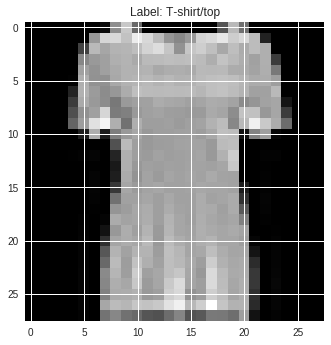

In [79]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()
fashion_class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + fashion_class_labels[fashion_train_labels[test_index]])
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
# Normalize the input data set
# flatten images
fashion_train_data = fashion_train_data.reshape((60000, 784))
fashion_train_data = fashion_train_data.astype('float32') / 255

fashion_test_data = fashion_test_data.reshape((10000, 784)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# one hot encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

validation_set_labels = fashion_train_labels[50000:]
validation_set = fashion_train_data[50000:]

training_set_labels = fashion_train_labels[:50000]
training_set = fashion_train_data[:50000]

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [83]:
# Crate NN

nn_fashion_model = models.Sequential()
fashion_dropout = 0.3

nn_fashion_model.add(layers.Dense(1024, activation= "relu", input_shape= (784,)))

nn_fashion_model.add(layers.Dropout(fashion_dropout))

nn_fashion_model.add(layers.Dense(256, activation="relu"))
nn_fashion_model.add(layers.Dense(128, activation="relu"))

nn_fashion_model.add(layers.Dropout(fashion_dropout))

# Last layer, same size has the number of categories
nn_fashion_model.add(layers.Dense(10, activation="softmax"))



nn_fashion_early_stops = [
    callbacks.EarlyStopping(monitor= 'val_loss', patience= 4)
]

nn_fashion_model.compile(
    loss= "categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"]
)

nn_fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_47 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_87 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 10)                1290      
Total params: 1,100,426
Trainable params: 1,100,426
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Train the NN model
fashion_epochs = 16
nn_fashion_history = nn_fashion_model.fit(
    fashion_train_data,
    fashion_train_labels,
    batch_size= 1024,
    epochs= fashion_epochs,
    verbose= 2,
    callbacks= nn_fashion_early_stops,
    validation_data= (validation_set, validation_set_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
 - 8s - loss: 0.2937 - acc: 0.8914 - val_loss: 0.2599 - val_acc: 0.9040
Epoch 2/16
 - 8s - loss: 0.2802 - acc: 0.8981 - val_loss: 0.2385 - val_acc: 0.9092
Epoch 3/16
 - 8s - loss: 0.2706 - acc: 0.8992 - val_loss: 0.2495 - val_acc: 0.9055
Epoch 4/16
 - 8s - loss: 0.2676 - acc: 0.9007 - val_loss: 0.2270 - val_acc: 0.9151
Epoch 5/16
 - 8s - loss: 0.2605 - acc: 0.9033 - val_loss: 0.2344 - val_acc: 0.9102
Epoch 6/16
 - 8s - loss: 0.2562 - acc: 0.9049 - val_loss: 0.2134 - val_acc: 0.9199
Epoch 7/16
 - 8s - loss: 0.2461 - acc: 0.9079 - val_loss: 0.2092 - val_acc: 0.9209
Epoch 8/16
 - 8s - loss: 0.2432 - acc: 0.9098 - val_loss: 0.2098 - val_acc: 0.9181
Epoch 9/16
 - 8s - loss: 0.2395 - acc: 0.9116 - val_loss: 0.2031 - val_acc: 0.9207
Epoch 10/16
 - 8s - loss: 0.2349 - acc: 0.9114 - val_loss: 0.2051 - val_acc: 0.9192
Epoch 11/16
 - 8s - loss: 0.2298 - acc: 0.9135 - val_loss: 0.2134 - val_acc: 0.9189
Epoch 12/16
 - 8s - loss: 0.2287 - 

10000/10000 [==============================] - 1s 121us/step
Fashion score: 89.36%


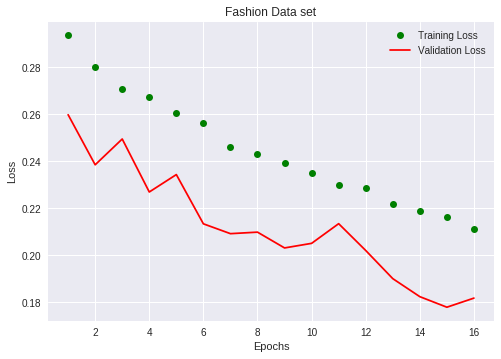

In [93]:
fashion_result = nn_fashion_model.evaluate(fashion_test_data, fashion_test_labels)
print('Fashion score: {}%'.format(fashion_result[1]*100))


fashion_history  = nn_fashion_history.history
fashion_acc      = fashion_history['acc']
fashion_val_acc  = fashion_history['val_acc']
fashion_loss     = fashion_history['loss']
fashion_val_loss = fashion_history['val_loss']
fashion_epochs   = range(1, len(fashion_acc) + 1)

plt.plot(fashion_epochs, fashion_loss, 'go', label='Training Loss')
plt.plot(fashion_epochs, fashion_val_loss, 'r', label='Validation Loss')

plt.title('Fashion Data set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [3]:
reuters_max_words = 10000
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=reuters_max_words)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [4]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

557056/550378 [==============================] - 0s 0us/step
<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [5]:
tokenizer = Tokenizer(num_words=reuters_max_words)

reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode="binary")
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode="binary")

reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels  = to_categorical(reuters_test_labels)

reuters_val_data, reuters_val_labels = reuters_train_data_token[:1000], reuters_one_hot_train_labels[:1000]

reuters_train_data, reuters_train_labels = reuters_train_data_token[1000:], reuters_one_hot_train_labels[1000:]

print('train:')
print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print('val:')
print(reuters_val_data.shape)
print(reuters_val_labels.shape)
print('test:')
print(reuters_test_data_token.shape)
print(reuters_one_hot_test_labels.shape)


train:
(7982, 10000)
(7982, 46)
val:
(1000, 10000)
(1000, 46)
test:
(2246, 10000)
(2246, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [50]:
reuters_model   = models.Sequential()
reuters_dropout = 0.3

reuters_model.add(layers.Dense(1024, activation="tanh", input_dim=10000))

reuters_model.add(layers.Dropout(reuters_dropout))

reuters_model.add(layers.Dense(256, activation="relu"))
reuters_model.add(layers.Dense(128, activation="relu"))

reuters_model.add(layers.Dropout(reuters_dropout))

reuters_model.add(layers.Dense(46, activation="softmax"))

reuters_model.compile(
    loss= "categorical_crossentropy", optimizer= "adamax", metrics= ["accuracy"]
)

reuters_model.summary()


reuters_early_stops = [
    callbacks.EarlyStopping(monitor= 'val_loss', patience= 4),
    callbacks.EarlyStopping(monitor= 'val_acc',  patience= 5)
]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dropout_35 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 46)                5934      
Total params: 10,542,254
Trainable params: 10,542,254
Non-trainable params: 0
________________________________________________________________

In [51]:
reuters_model_history = reuters_model.fit(
    reuters_train_data,
    reuters_train_labels,
    batch_size= 1024,
    epochs= 16,
    verbose= 2,
    #callbacks= reuters_early_stops,
    validation_data= (reuters_val_data, reuters_val_labels)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/16
 - 9s - loss: 2.6947 - acc: 0.4553 - val_loss: 1.5795 - val_acc: 0.6510
Epoch 2/16
 - 7s - loss: 1.4296 - acc: 0.6889 - val_loss: 1.2355 - val_acc: 0.7210
Epoch 3/16
 - 7s - loss: 1.0428 - acc: 0.7597 - val_loss: 1.0334 - val_acc: 0.7770
Epoch 4/16
 - 7s - loss: 0.7989 - acc: 0.8201 - val_loss: 0.9555 - val_acc: 0.7880
Epoch 5/16
 - 7s - loss: 0.6092 - acc: 0.8632 - val_loss: 0.8835 - val_acc: 0.8110
Epoch 6/16
 - 7s - loss: 0.4545 - acc: 0.8971 - val_loss: 0.8705 - val_acc: 0.8160
Epoch 7/16
 - 7s - loss: 0.3489 - acc: 0.9201 - val_loss: 0.8510 - val_acc: 0.8210
Epoch 8/16
 - 7s - loss: 0.2813 - acc: 0.9342 - val_loss: 0.8841 - val_acc: 0.8200
Epoch 9/16
 - 7s - loss: 0.2255 - acc: 0.9432 - val_loss: 0.9112 - val_acc: 0.8190
Epoch 10/16
 - 7s - loss: 0.1894 - acc: 0.9494 - val_loss: 0.9397 - val_acc: 0.8220
Epoch 11/16
 - 7s - loss: 0.1681 - acc: 0.9543 - val_loss: 0.9711 - val_acc: 0.8250
Epoch 12/16
 - 7s - loss: 0.1501 - ac

2246/2246 [==============================] - 2s 838us/step
Fashion score: 79.29652715939449%


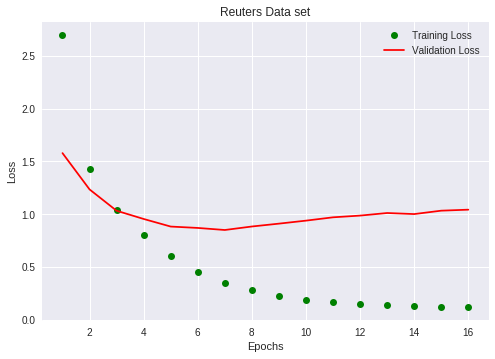

In [52]:
reuters_result = reuters_model.evaluate(
    reuters_test_data_token, 
    reuters_one_hot_test_labels
)

print('Fashion score: {}%'.format(reuters_result[1]*100))


reuters_history  = reuters_model_history.history
reuters_acc      = reuters_history['acc']
reuters_val_acc  = reuters_history['val_acc']
reuters_loss     = reuters_history['loss']
reuters_val_loss = reuters_history['val_loss']
reuters_epochs   = range(1, len(reuters_acc) + 1)

plt.plot(reuters_epochs, reuters_loss, 'go', label='Training Loss')
plt.plot(reuters_epochs, reuters_val_loss, 'r', label='Validation Loss')

plt.title('Reuters Data set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [2]:
student_data = pd.read_csv("student_data.csv")
print(student_data)
print(student_data.shape)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

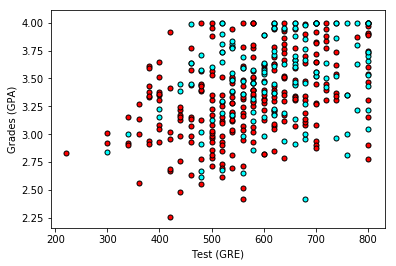

In [3]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

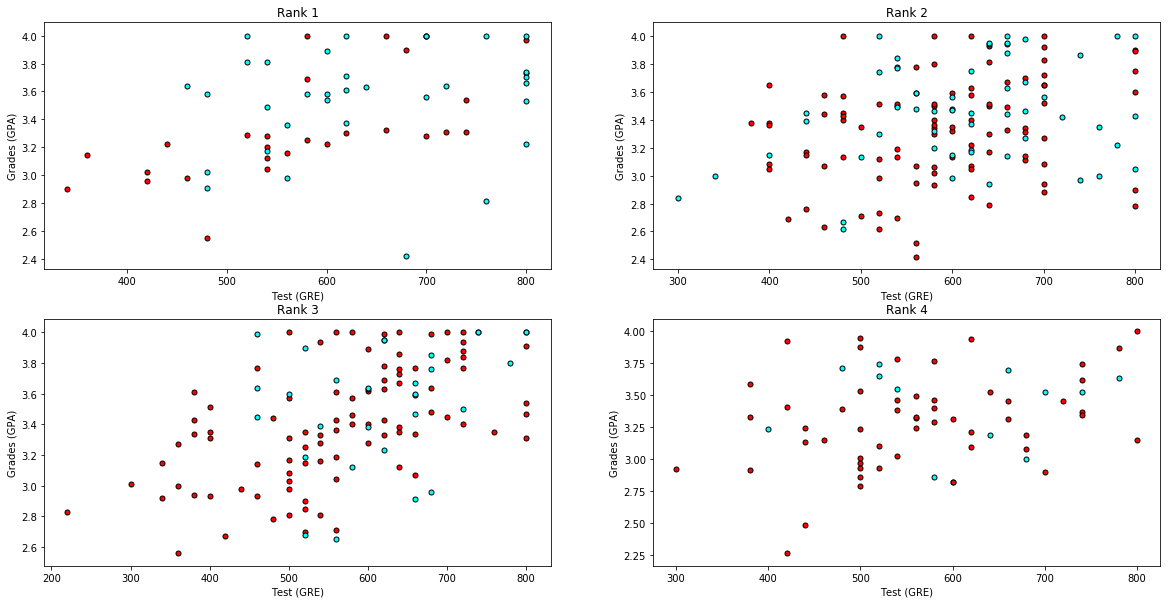

In [5]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set